# Firm-level data sets

Let's take a quick look at a firm-level dataset. The goal is to see what kind of data are there and explore the heterogeneity across firms. 

The dataset is from Colombia.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
labels = pd.io.stata.StataReader('EAM_1992_2017_FINAL.dta').variable_labels()
col = pd.read_stata('EAM_1992_2017_FINAL.dta')
col.shape

(208545, 17)

## Variables

This dataset has been cleaned and this is only a subset of the variables available. 

In [3]:
labels

{'Plant_ID': 'Plant ID',
 'year': '',
 'interm_cons': 'Consumption of Intermediates',
 'electricity': 'Electricity',
 'labor': 'Total labor',
 'wages': 'Wage Bill',
 'fixed_assets': 'Fixed Assets',
 'gross_prod': 'Gross Production',
 'value_added': 'Value Added',
 'interm_exp': 'Expenditures on intermediates',
 'sales': 'Sales',
 'Firm_ID': 'Firm_ID',
 'exports': 'Exports',
 'imports': 'Imports',
 'ISIC2': '',
 'ISIC3': '',
 'ISIC4': ''}

In [4]:
col.sample(5)

Plant_ID    year  interm_cons  electricity  labor     wages  \
74207     866954  2012.0     913584.0      11867.0   20.0  170195.0   
105076    976636  2006.0    1992447.0      43132.0   27.0  220566.0   
20489     145344  2017.0     295334.0      18904.0   13.0   97393.0   
96289     975742  2008.0    1071941.0     273225.0   19.0  157204.0   
207781    987590  2004.0    3931274.0     324220.0   95.0  369799.0   

        fixed_assets  gross_prod  value_added  interm_exp      sales  \
74207       167456.0   1549519.0     635935.0    481931.0  1549519.0   
105076     1356497.0   2881959.0     843660.0   1377153.0  2881959.0   
20489      1087358.0    318510.0      26431.0    214475.0   333200.0   
96289       317960.0   1875625.0     803684.0    986106.0  1814000.0   
207781     1323082.0   5565874.0    1634600.0   3641787.0  5562500.0   

         Firm_ID  exports  imports   ISIC2   ISIC3   ISIC4  
74207   867055.0      0.0      0.0  3909.0  3699.0  2599.0  
105076  977039.0      0.0      0.0  3813.0  2811.0  2511.0  
20489   145427.0      0.0      0.0  3420.0  2220.0  1811.0  
96289   976145.0     10.0      0.0  3560.0  2529.0  2229.0  
207781  987590.0      0.0      NaN  3117.0  1551.0  1081.0

### A cross-section

The relationship between the cross section and the underlying dynamics is interesting and we will see from the models how they interact. An interesting cross-sectional fact is the heterogeneity between exporters and nonexporters. 

Let's take a look at 2015. 

In [5]:
col15 = col[col['year']==2015].copy()
col15.shape

(8904, 17)

This is value added per worker, which is a rough measure of productivity. We have enough data here to estimate TFP using an Olley-Pakes type approach. 

In [6]:
col15['va_emp'] = np.log(col15['value_added']/col['labor'])
col15['va_emp'] = col15['va_emp'].replace([np.inf, -np.inf], np.nan)

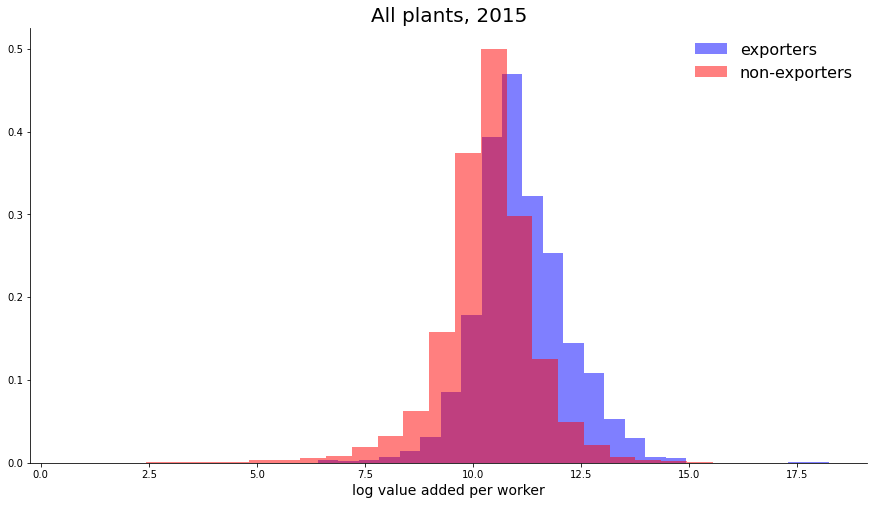

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(col15[col15['exports']>0]['va_emp'].dropna(), bins=25, alpha=0.5, color='blue', density=True, label='exporters')
ax.hist(col15[col15['exports']==0]['va_emp'].dropna(), bins=25, color='red', alpha = 0.5, density=True, label='non-exporters')
ax.set_xlabel('log value added per worker', fontsize=14)
ax.set_title('All plants, 2015', fontsize=20)
ax.legend(frameon=False, fontsize=16)
sns.despine()

The exporter distribution is shifted to the right: Exporters are more efficient than nonexporters. Note, however, that there is still lots of overlap in the distributions. There are very productive nonexporters and very unproductive exporters.

One issue could be composition. Perhaps exporters are in different industries (that have higher productivity) than nonexporters. 

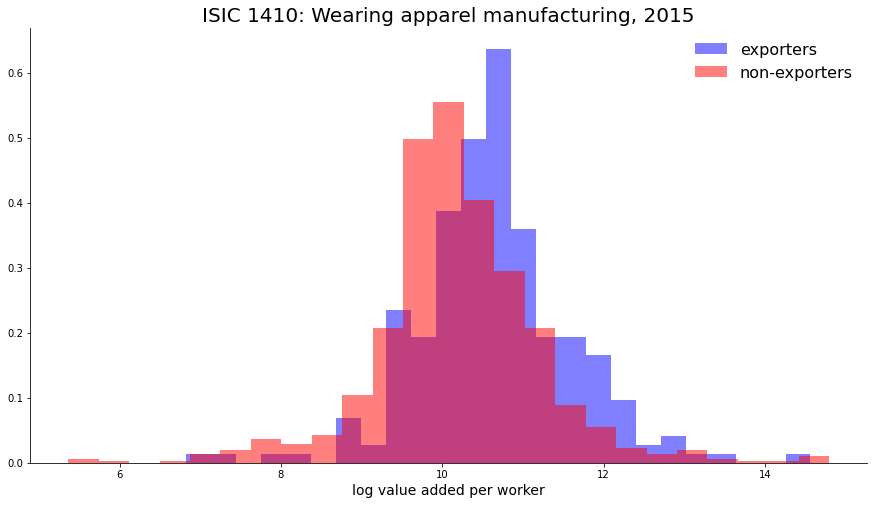

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
ax.hist(col15[(col15['exports']>0)&(col15['ISIC4']==1410)]['va_emp'].dropna(), bins=25, alpha=0.5, color='blue', density=True, label='exporters')
ax.hist(col15[(col15['exports']==0)&(col15['ISIC4']==1410)]['va_emp'].dropna(), bins=25, color='red', alpha = 0.5, density=True, label='non-exporters')
ax.set_xlabel('log value added per worker', fontsize=14)
ax.set_title('ISIC 1410: Wearing apparel manufacturing, 2015', fontsize=20)
ax.legend(frameon=False, fontsize=16)
sns.despine()